# Machine learning - 1st practice project

Red Wine Quality Prediction Project

Project Description ---

'The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.'

STEP - 1
EXPLORATORY DATA ANALYSIS

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv("C:/Users/user/Downloads/winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [11]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values in the given data.

<Axes: >

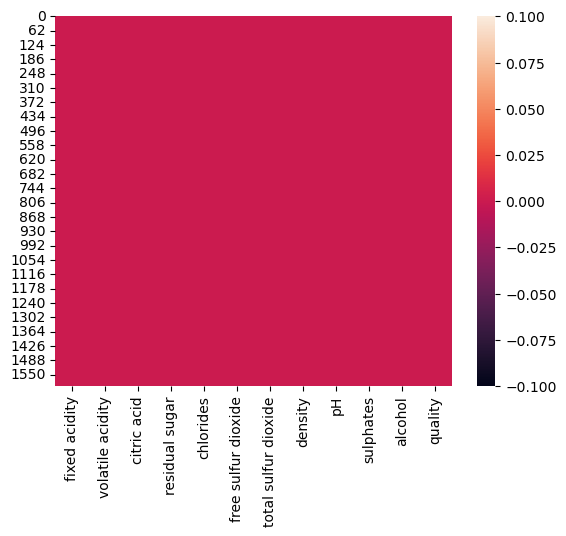

In [16]:
sns.heatmap(df.isnull())

As we can see visually using heatmap, there are no missing values..

In [20]:
for i in df.columns:
    print(df[i].value_counts(dropna=False))
    print('\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

--Here we check the value counts for each column, so that we can find count of the number of unique elements in a column.
  As we can see, there are many values present in the quality scale of 5,6 and 7 in the quality column.

--The values are present more in the region of 5,6,and 7. There are few values present in the region of 8 and 3.

--So, we can divide the based on this assumption that:
  quality < 5 = 'low quality'
  , quality 5 <= 7 = 'Average quality', quality > 7 = 'High quality'

In [21]:
df.nunique().to_frame("No of unique values")

No of unique values
fixed acidity                          96
volatile acidity                      143
citric acid                            80
residual sugar                         91
chlorides                             153
free sulfur dioxide                    60
total sulfur dioxide                  144
density                               436
pH                                     89
sulphates                              96
alcohol                                65
quality                                 6

Another way of finding unique values present in the dataset.

# Univariate analysis(Graphical and Non-graphical)

In [22]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

-- As we can see from the above data, we have various statistical elements present such as mean,std deviation,
   first quartile(25%),second quartile(50%) and third quartile(75%).

-- As we know that, if 
   mean > median = right skewed; 
    mean < median = left skewed. 
    And from the above data, we can see most of our features are right or positively skewed except for 'density' column which is     slightly skewed to the left.

-- If the difference between the third quartile and the max value is huge,there might be presence of outliers.
   From the 'total sulfur dioxide' column we can see that difference is huge and there might be presence of outliers.
   There is also a difference in 'residual sugar' and 'free sulfur dioxide' columns.
   We can check the presence of outliers by plotting box plot.
   
-- The larger the value of std. deviation,the farther the spread of data.
   The feature 'total sulphur dioxide' has high std. deviation, which means the data are spread widely, while other with low std.deviation are mostly clustered near the mean.

<Axes: xlabel='fixed acidity', ylabel='Density'>

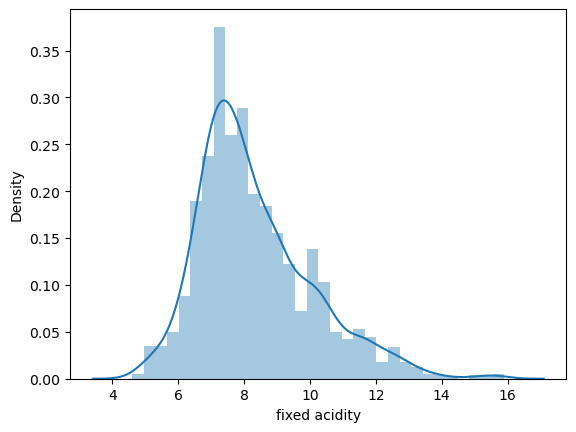

In [25]:
#Now for the graphical analysis
#To check distribution of skewness
sns.distplot(df['fixed acidity'])

<Axes: xlabel='volatile acidity', ylabel='Density'>

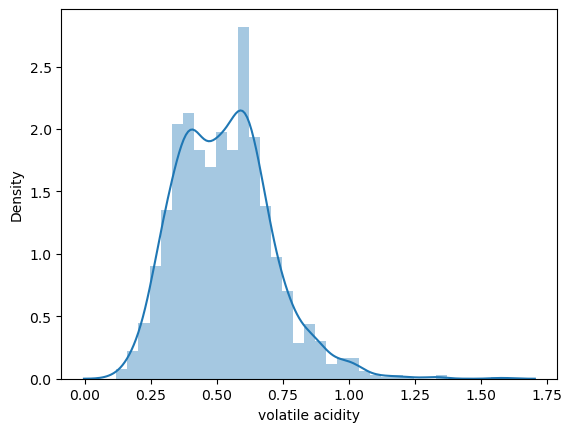

In [26]:
sns.distplot(df['volatile acidity'])

<Axes: xlabel='citric acid', ylabel='Density'>

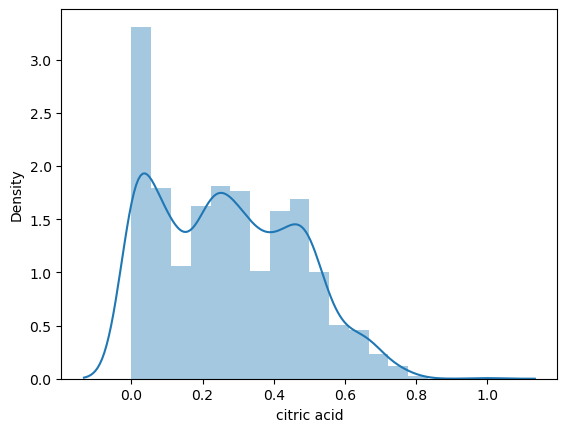

In [27]:
sns.distplot(df['citric acid'])

<Axes: xlabel='residual sugar', ylabel='Density'>

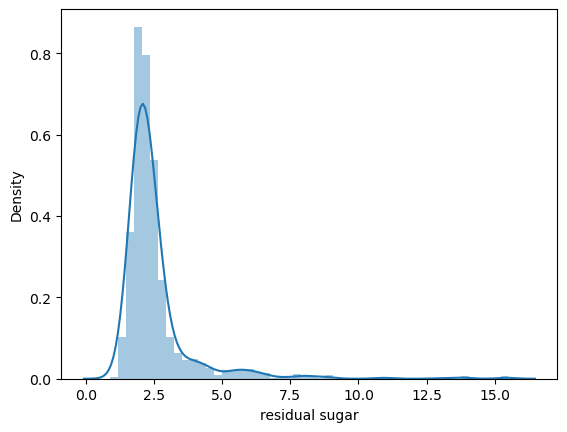

In [28]:
sns.distplot(df['residual sugar'])

<Axes: xlabel='chlorides', ylabel='Density'>

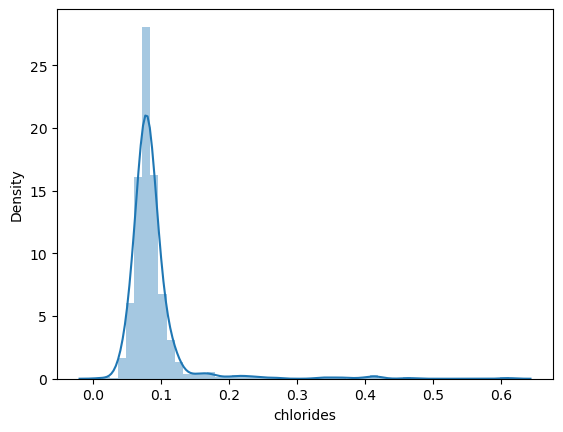

In [30]:
sns.distplot(df['chlorides'])

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

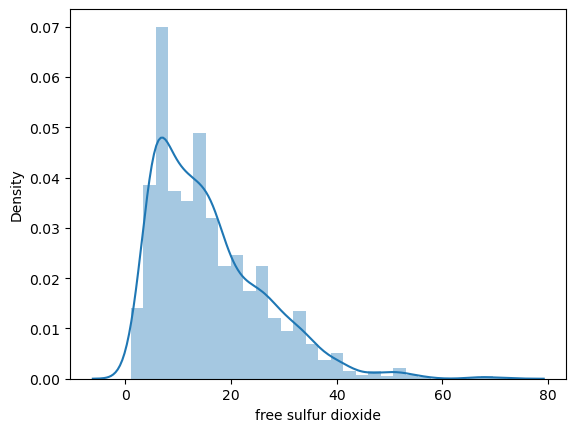

In [31]:
sns.distplot(df['free sulfur dioxide'])

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

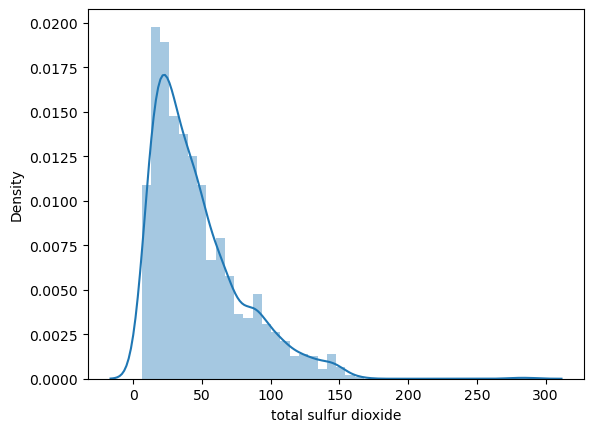

In [32]:
sns.distplot(df['total sulfur dioxide'])

<Axes: xlabel='density', ylabel='Density'>

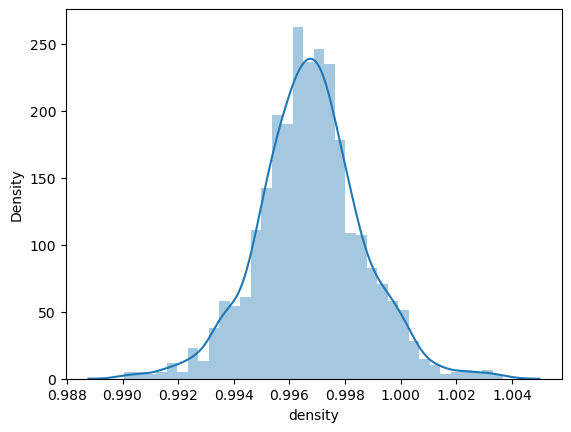

In [29]:
sns.distplot(df['density'])

<Axes: xlabel='pH', ylabel='Density'>

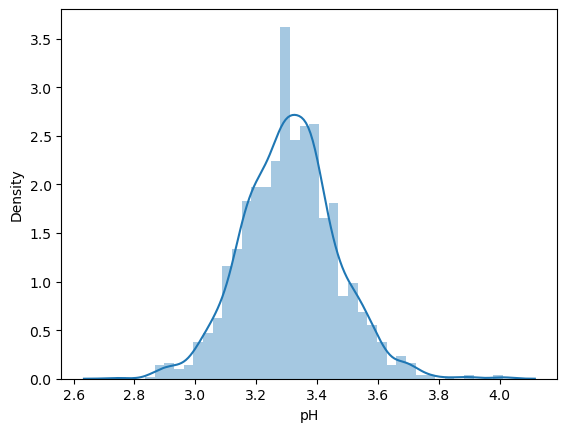

In [33]:
sns.distplot(df['pH'])

<Axes: xlabel='sulphates', ylabel='Density'>

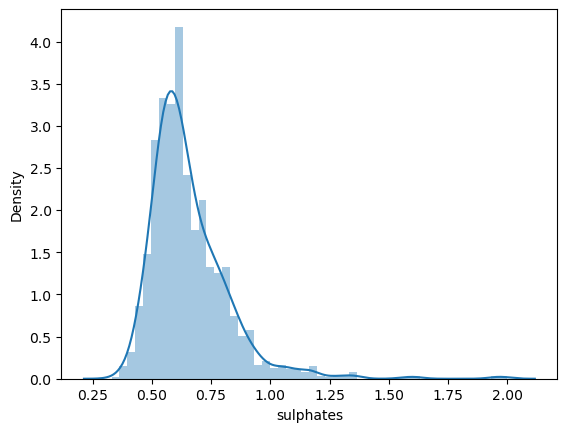

In [34]:
sns.distplot(df['sulphates'])

<Axes: xlabel='alcohol', ylabel='Density'>

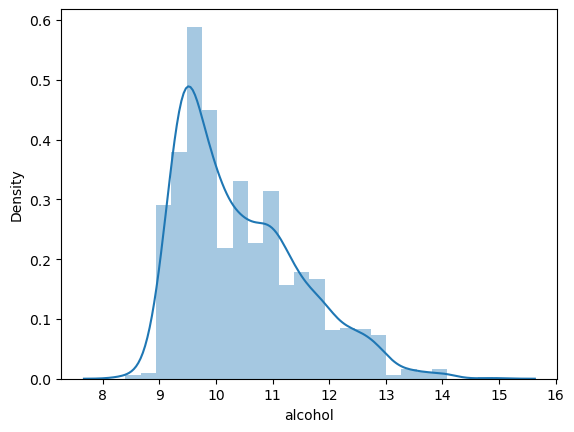

In [35]:
sns.distplot(df['alcohol'])

-- From the above plots,we can see that most of the features are right or positively skewed.
   Except 'density' and 'pH' features as they are perfectly distributed (normal distribution).

<Axes: xlabel='quality', ylabel='Count'>

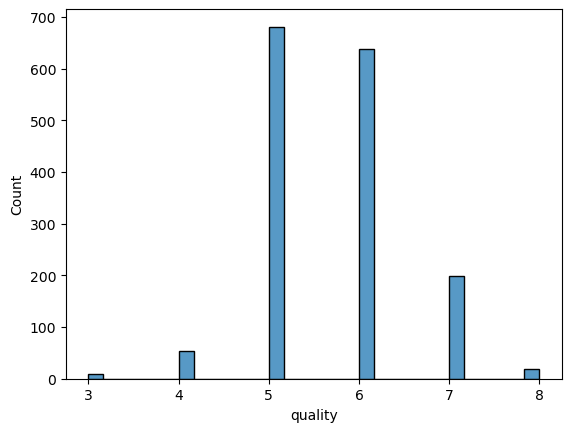

In [38]:
#Let's check with histograms
sns.histplot(df,x='quality')

<Axes: xlabel='quality'>

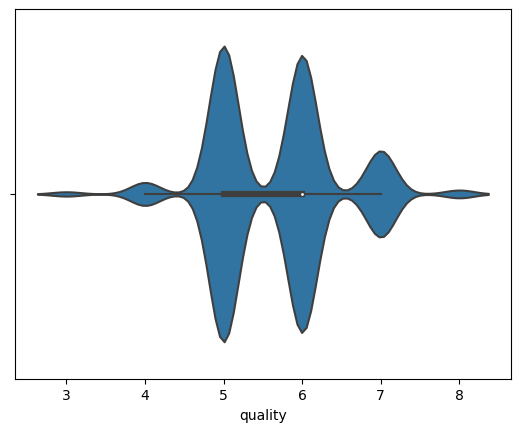

In [42]:
sns.violinplot(df,x='quality')

-- As our conclusion earlier, most of the data are concentrated on the quality scale of 5,6 and 7.

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


<Axes: xlabel='fixed acidity', ylabel='Count'>

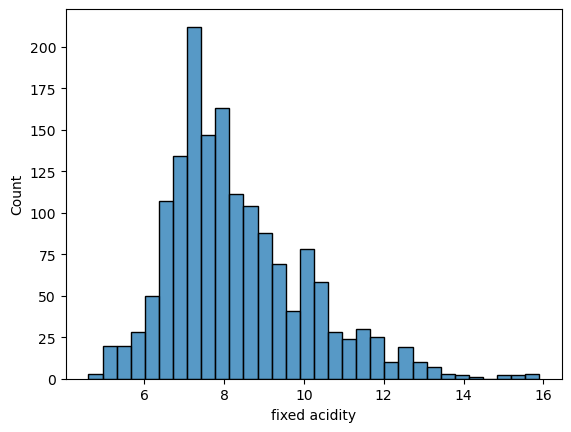

In [51]:
print(df['fixed acidity'].value_counts())
sns.histplot(df,x='fixed acidity')

-- Most values are concentrated at 7.2 fixed acidity

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


<Axes: xlabel='volatile acidity', ylabel='Count'>

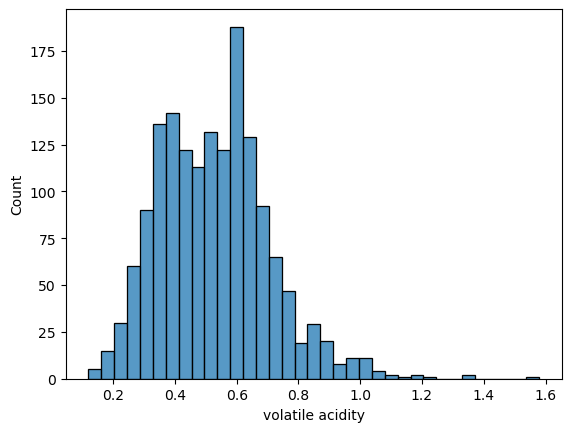

In [48]:
print(df['volatile acidity'].value_counts())
sns.histplot(df,x='volatile acidity')

-- Most values are grouped at 0.6 volatile acidity.

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


<Axes: xlabel='citric acid', ylabel='Count'>

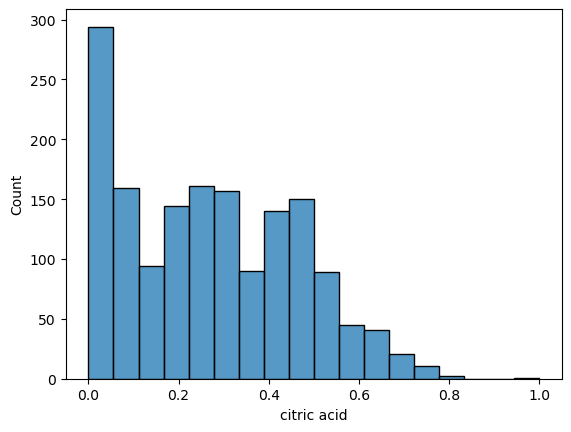

In [52]:
print(df['citric acid'].value_counts())
sns.histplot(df,x='citric acid')

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


<Axes: xlabel='residual sugar', ylabel='Count'>

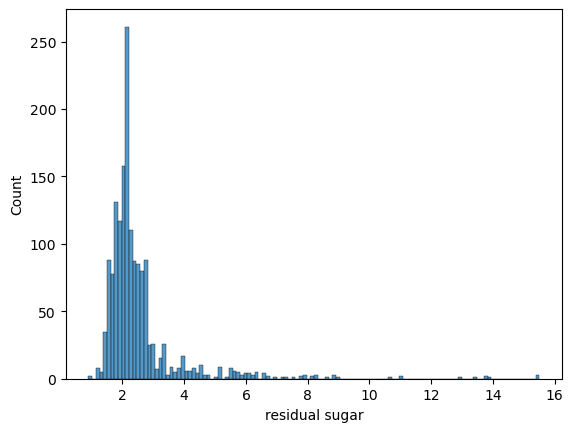

In [54]:
print(df['residual sugar'].value_counts())
sns.histplot(df,x='residual sugar')

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


<Axes: xlabel='chlorides', ylabel='Count'>

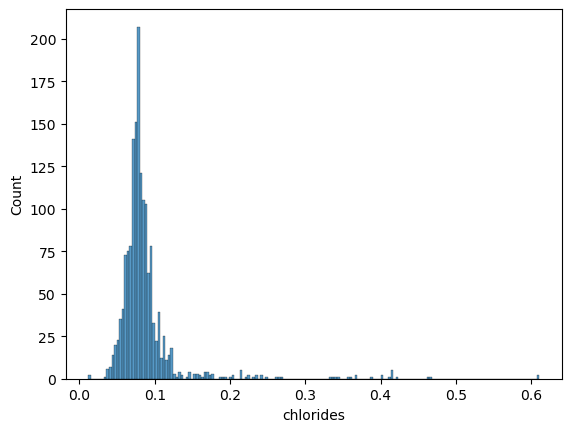

In [55]:
print(df['chlorides'].value_counts())
sns.histplot(df,x='chlorides')

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
29.0     23
28.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
36.0     11
33.0     11
38.0      9
41.0      7
40.0      6
39.0      5
48.0      4
51.0      4
45.0      3
1.0       3
43.0      3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
53.0      1
72.0      1
57.0      1
47.0      1
5.5       1
2.0       1
46.0      1
54.0      1
40.5      1
66.0      1
Name: free sulfur dioxide, dtype: int64


<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

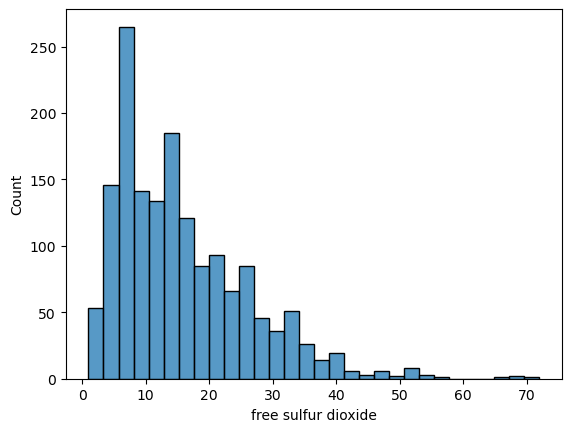

In [56]:
print(df['free sulfur dioxide'].value_counts())
sns.histplot(df,x='free sulfur dioxide')

28.0     43
24.0     36
15.0     35
18.0     35
23.0     34
         ..
139.0     1
149.0     1
152.0     1
155.0     1
165.0     1
Name: total sulfur dioxide, Length: 144, dtype: int64


<Axes: xlabel='total sulfur dioxide', ylabel='Count'>

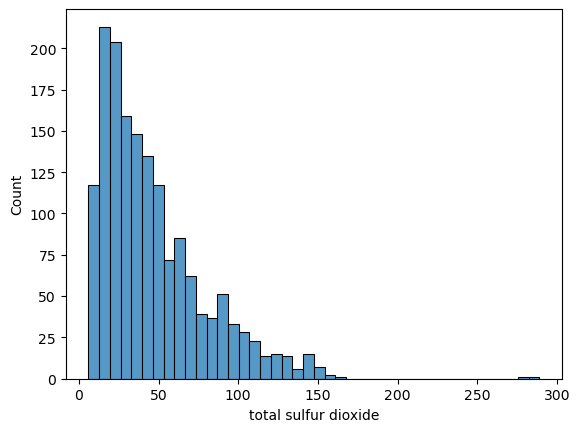

In [57]:
print(df['total sulfur dioxide'].value_counts())
sns.histplot(df,x='total sulfur dioxide')

0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99684     1
0.99764     1
0.99473     1
0.99320     1
0.99651     1
Name: density, Length: 436, dtype: int64


<Axes: xlabel='density', ylabel='Count'>

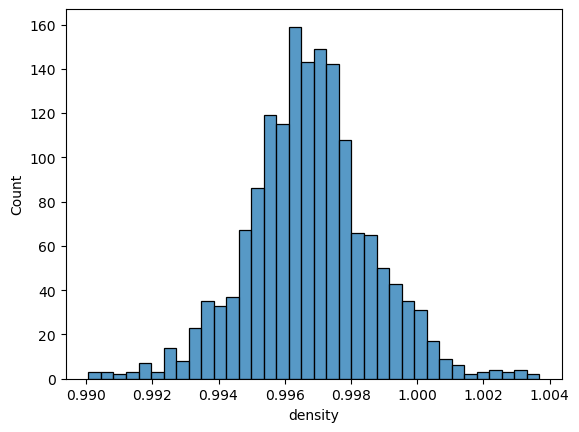

In [58]:
print(df['density'].value_counts())
sns.histplot(df,x='density')

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64


<Axes: xlabel='pH', ylabel='Count'>

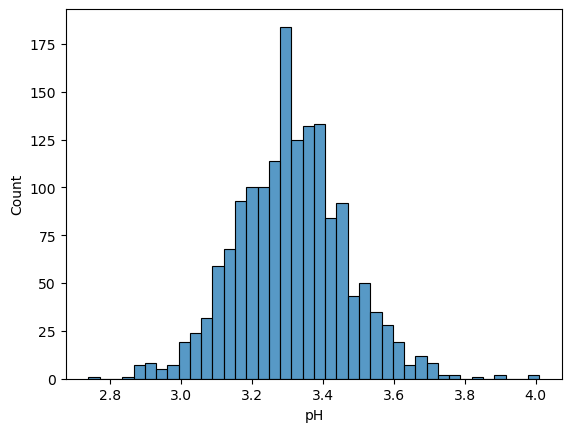

In [59]:
print(df['pH'].value_counts())
sns.histplot(df,x='pH')

-- 'Density' and 'pH' are normally distributed as you can see from the above histograms.

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: sulphates, Length: 96, dtype: int64


<Axes: xlabel='sulphates', ylabel='Count'>

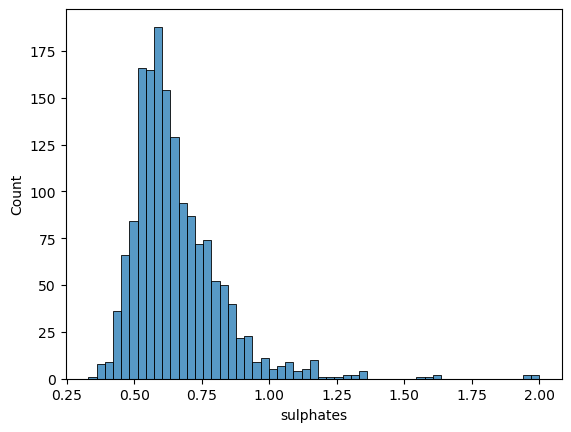

In [60]:
print(df['sulphates'].value_counts())
sns.histplot(df,x='sulphates')

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64


<Axes: xlabel='alcohol', ylabel='Count'>

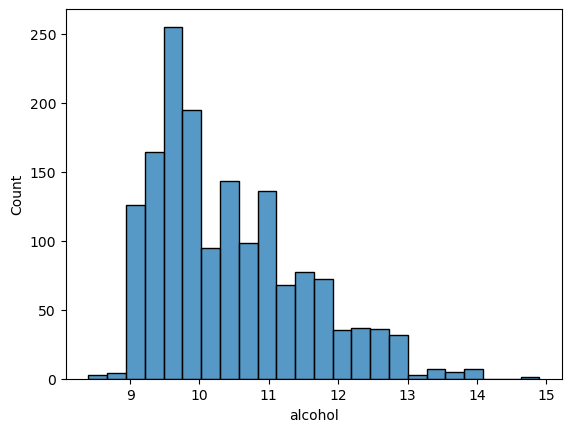

In [61]:
print(df['alcohol'].value_counts())
sns.histplot(df,x='alcohol')

# Bivariate Analysis

-- Now we shall see how the variables(features) are related to each other and what can we derive from them.
   Also we shall check how the independent variables are correlated to the dependent feature.

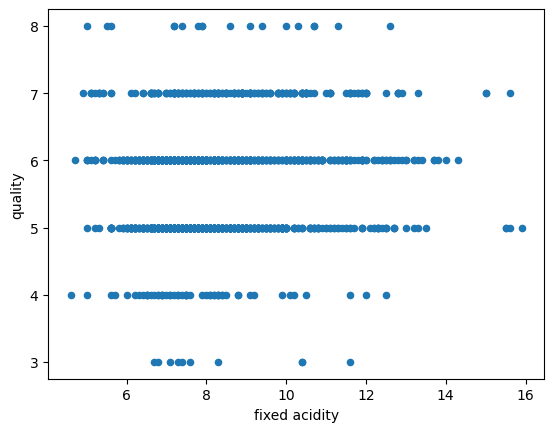

In [9]:
df.plot.scatter(x='fixed acidity',y='quality')
plt.show()

-- We can see that the from the quality scale of wine, most of the values of scales 5,6 and 7 have fixed acidity of around 7 to  8

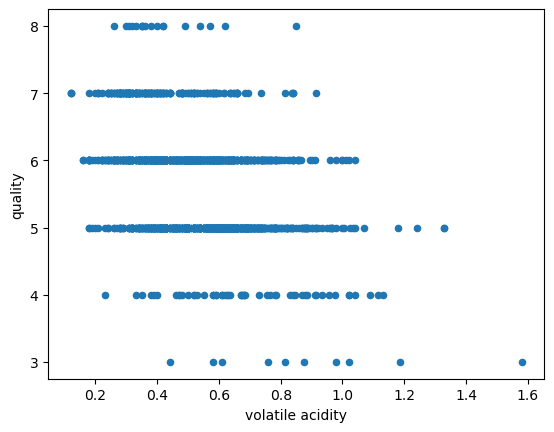

In [10]:
df.plot.scatter(x='volatile acidity',y='quality')
plt.show()

-- Same here with volatile acidity,most of the datapoints in the scales of 5,6 and 7 have a volatile acidity of around 0.4 to 0.8

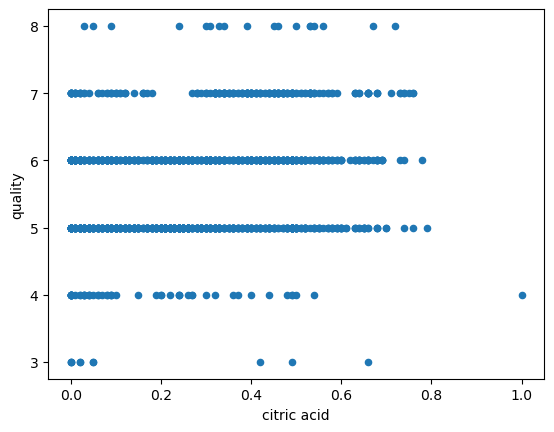

In [11]:
df.plot.scatter(x='citric acid',y='quality')
plt.show()

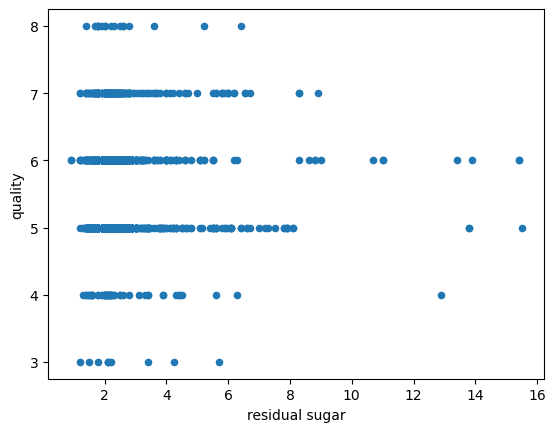

In [12]:
df.plot.scatter(x='residual sugar',y='quality')
plt.show()

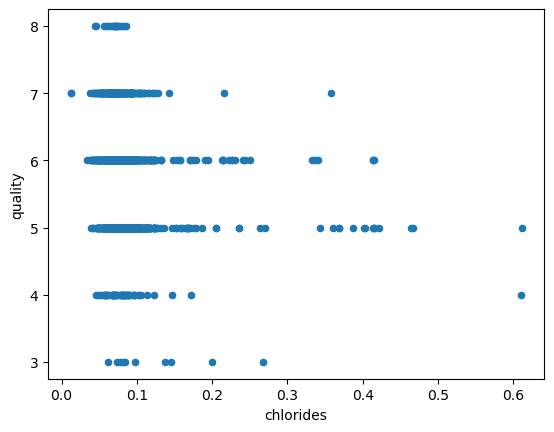

In [13]:
df.plot.scatter(x='chlorides',y='quality')
plt.show()

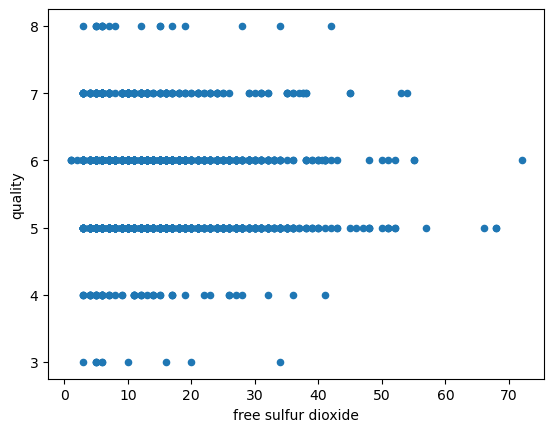

In [14]:
df.plot.scatter(x='free sulfur dioxide',y='quality')
plt.show()

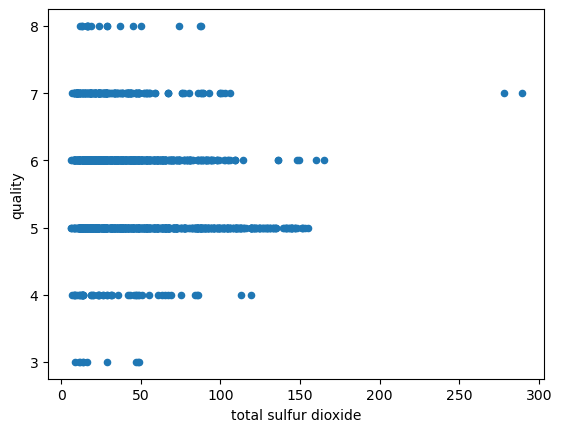

In [15]:
df.plot.scatter(x='total sulfur dioxide',y='quality')
plt.show()

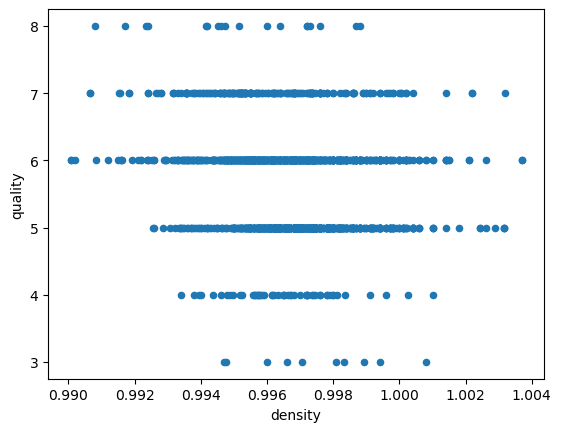

In [16]:
df.plot.scatter(x='density',y='quality')
plt.show()

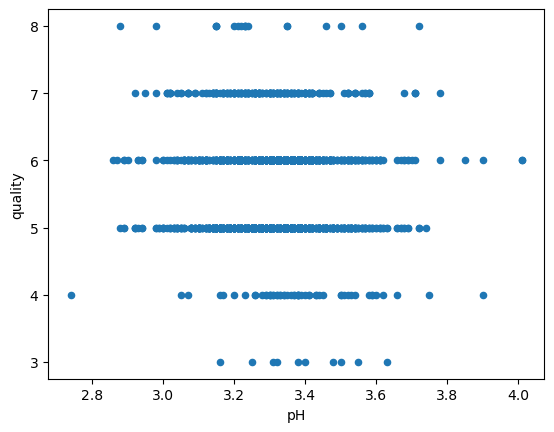

In [17]:
df.plot.scatter(x='pH',y='quality')
plt.show()

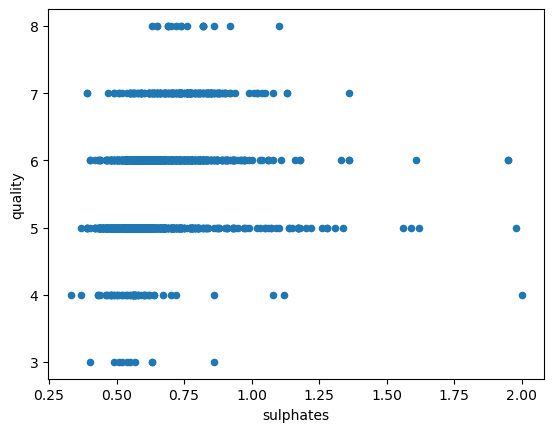

In [18]:
df.plot.scatter(x='sulphates',y='quality')
plt.show()

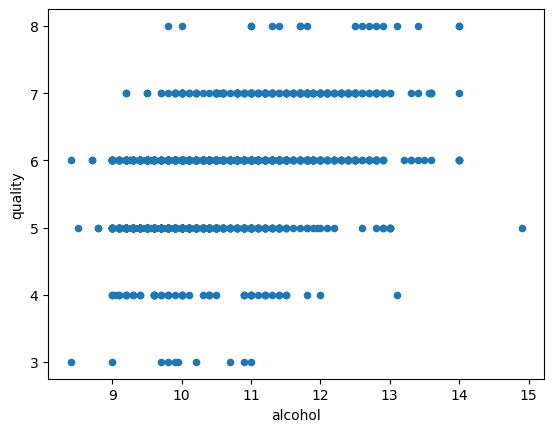

In [19]:
df.plot.scatter(x='alcohol',y='quality')
plt.show()

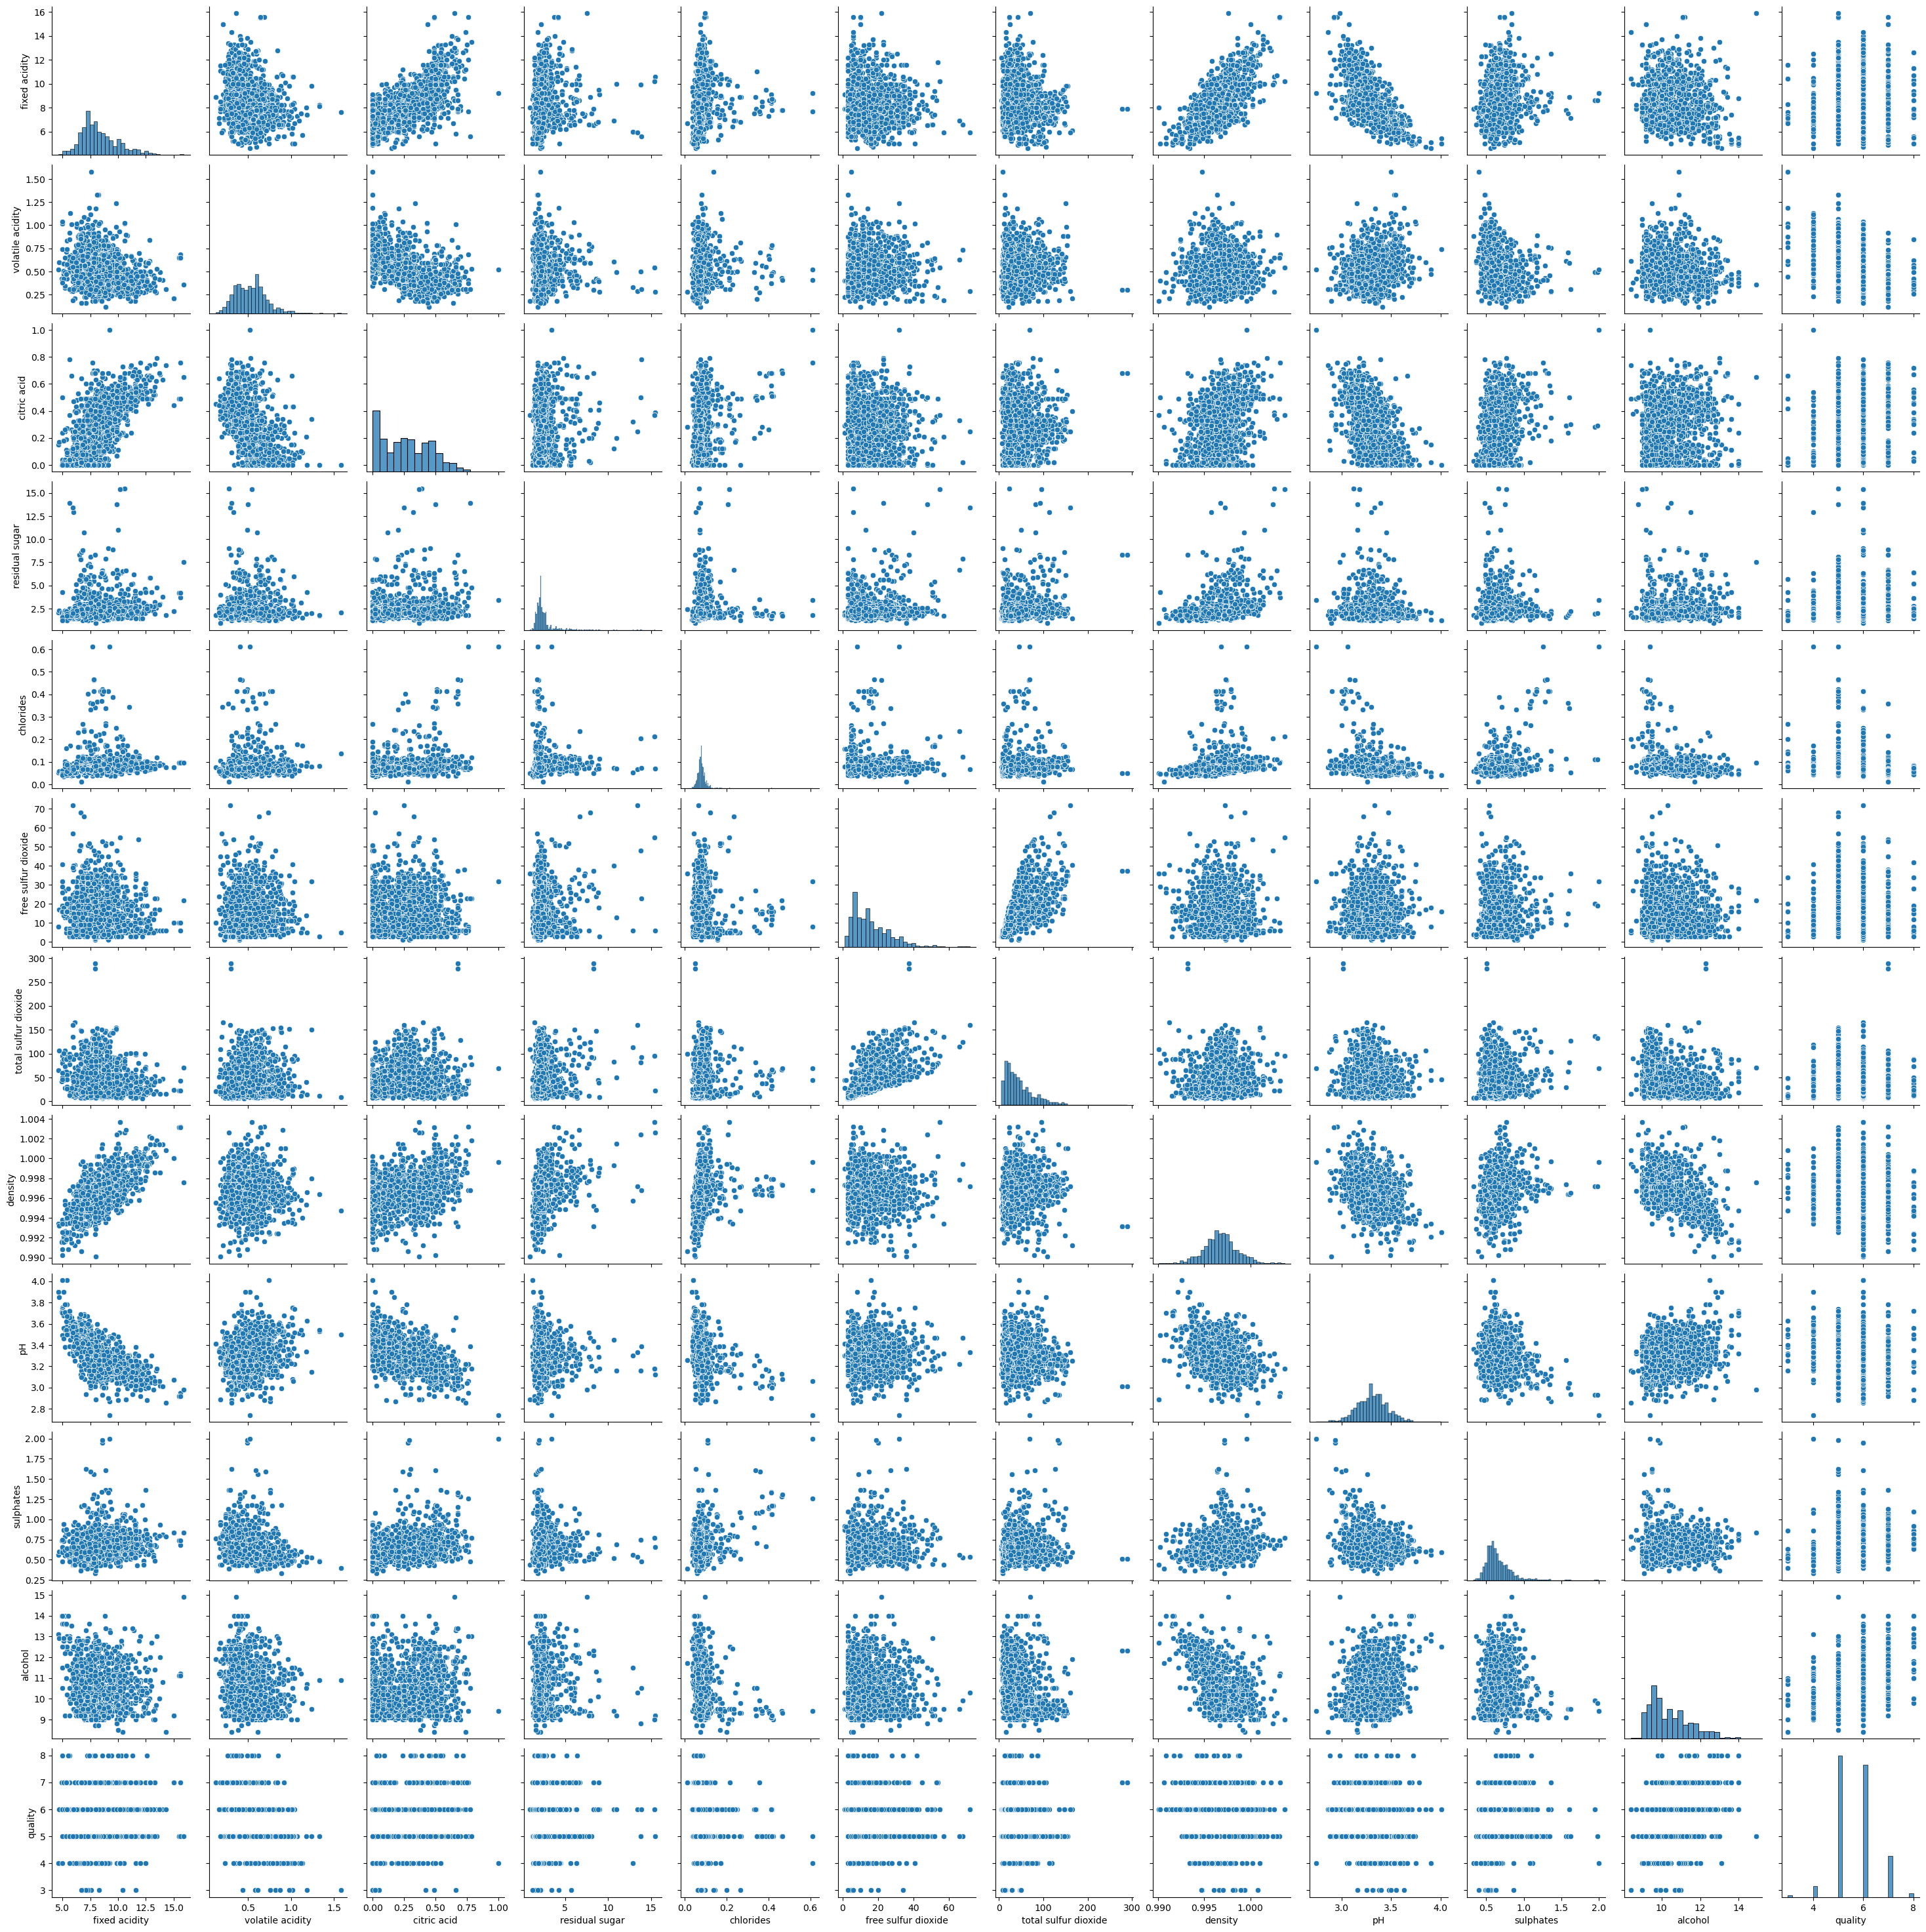

In [27]:
sns.pairplot(df)

In [20]:
# Now let's check for correlation of variables
df_cor = df.corr()
df_cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

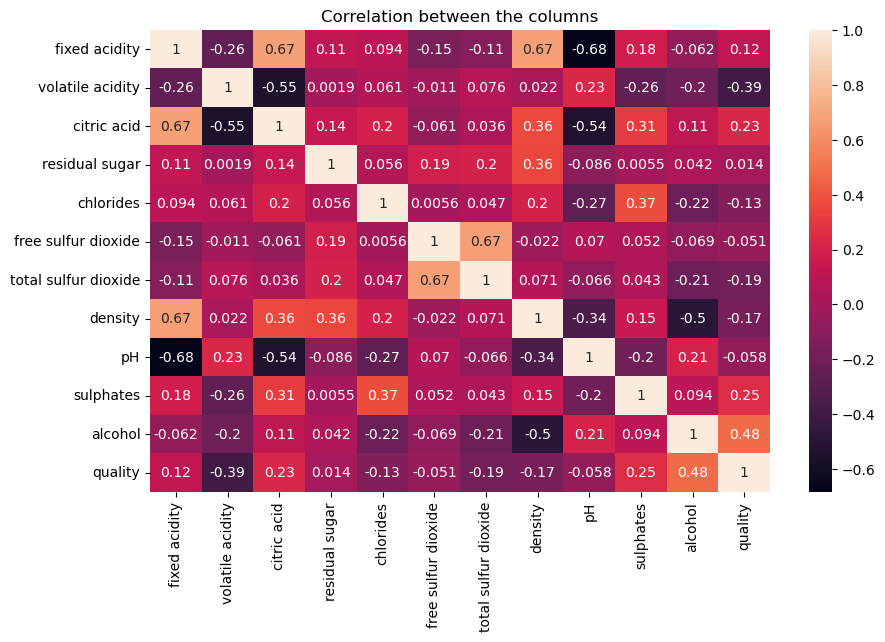

In [25]:
# Now let's visualise the above correlation values using heatmap and drop any columns which are least correlated to the target variable
plt.figure(figsize=(10,6))
sns.heatmap(df_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

-- As we can see from the data,
   'volatile acidity' has the least correlation with respect to quality, and 'alcohol' has the highest correlation with
   respect to quality. 
   (how?)--> From the color gradient,a lighter shade represents high correlation and a darker shade means less correlation.

# Checking and removing Outliers

fixed acidity              Axes(0.125,0.53;0.110714x0.35)
volatile acidity        Axes(0.257857,0.53;0.110714x0.35)
citric acid             Axes(0.390714,0.53;0.110714x0.35)
residual sugar          Axes(0.523571,0.53;0.110714x0.35)
chlorides               Axes(0.656429,0.53;0.110714x0.35)
free sulfur dioxide     Axes(0.789286,0.53;0.110714x0.35)
total sulfur dioxide       Axes(0.125,0.11;0.110714x0.35)
density                 Axes(0.257857,0.11;0.110714x0.35)
pH                      Axes(0.390714,0.11;0.110714x0.35)
sulphates               Axes(0.523571,0.11;0.110714x0.35)
alcohol                 Axes(0.656429,0.11;0.110714x0.35)
quality                 Axes(0.789286,0.11;0.110714x0.35)
dtype: object

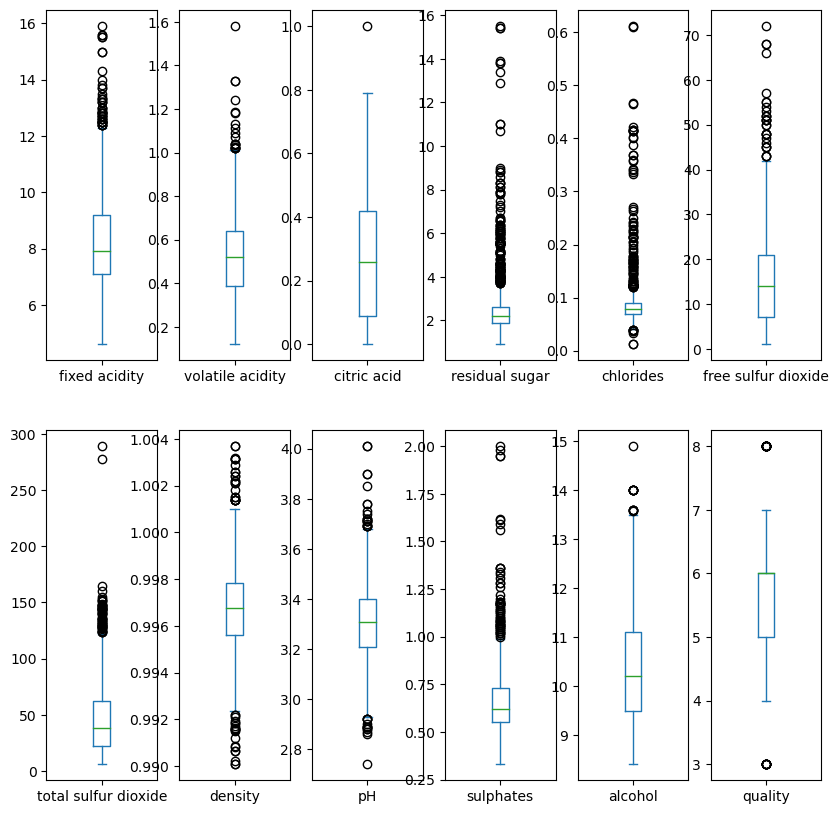

In [34]:
#Checking for outliers using boxplots
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

-- As we can see there are too many outliers, atleast one in every column.
   So, Let's get cleaning!!
   In order remove these outliers,we shall the z-score method..
   If z-score > 3, they are considered as outliers and we can remove them.

In [12]:
#Removing Outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.466193              0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261  0.719933   
2                0.083669              0.229047  0.134264  0.331177   
3                0.107592              0.411500  0.664277  0.979104   
4                0.466193              0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054              0.075043  0.978765  0.899886   
1595             2.211469              0.137820  0.862162  1.353436   
1596             1.255161              0.196679  0.533554  0.705508   
1597             1.542054              0.075043  0.676657  1.677400   
1598             0.203223              0.135861  0.666057  0.511130   

      sulphates   alcohol   quality  
0      0.579207  0.960246  0.787823  
1      0.128950  0.584777  0.787823  
2      0.048089  0.584777  0.787823  
3      0.461180  0.584777  0.450848  
4      0.579207  0.960246  0.787823  
...         ...       ...       ...  
1594   0.461180  0.072294  0.787823  
1595   0.601055  0.729364  0.450848  
1596   0.542042  0.541630  0.450848  
1597   0.305990  0.209308  0.787823  
1598   0.010924  0.541630  0.450848  

[1599 rows x 12 columns]

In [13]:
#threshold = 3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

-- First array represents row and second array represents column...

In [14]:
df_new = df[(z<3).all(axis=1)]
df_new

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1451 rows x 12 columns]

In [3]:
df.shape

(1599, 12)

In [15]:
df_new.shape

(1451, 12)

-- 148 rows are deleted as they have outliers...

In [45]:
#Checking for skewness..
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [10]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

-- As we can see, there is skewness present...
   But if we compare the skewness before removing outliers and after..it is reduced drastically..we shall remove skewness for
   'residual sugar','chlorides' and 'total sulfur dioxide' as it is still pretty high in these columns..

In [20]:
#Removing skewness
df_new['residual sugar'] = np.log(df_new['residual sugar'])

In [17]:
df_new['chlorides'] = np.log(df_new['chlorides'])

In [18]:
df_new['total sulfur dioxide'] = np.log(df_new['total sulfur dioxide'])

In [21]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar         -0.212314
chlorides               0.496272
free sulfur dioxide     0.869250
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

-- We can see that skewness has been reduced in the respective columns..
   We can see also see this visually by distplot..

<Axes: xlabel='residual sugar', ylabel='Density'>

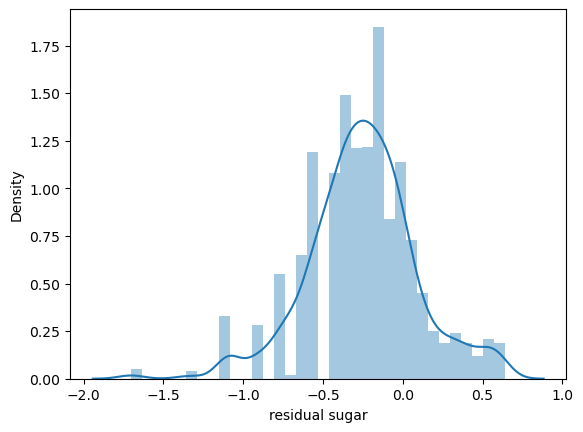

In [22]:
sns.distplot(df_new['residual sugar'])

<Axes: xlabel='chlorides', ylabel='Density'>

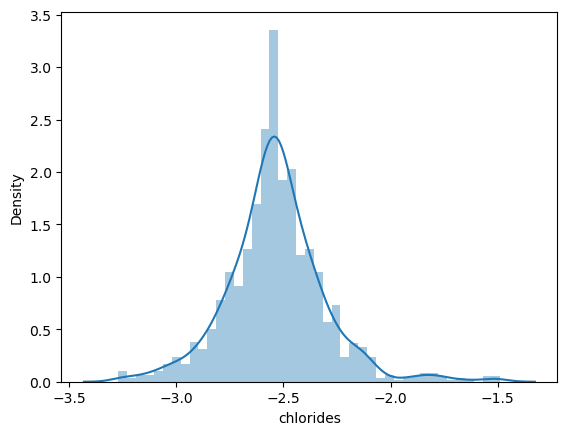

In [14]:
sns.distplot(df_new['chlorides'])

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

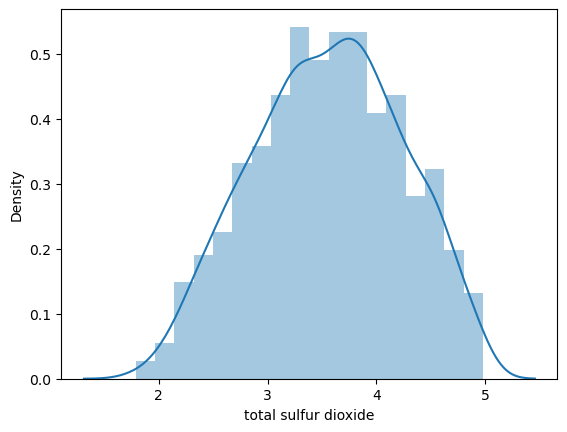

In [15]:
sns.distplot(df_new['total sulfur dioxide'])

# Data Processing

In [16]:
df_new['quality'].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

-- Now we have to categorise the quality variable into 0 and 1,so that it will be easier for us analyse the data.
   We categorise the data as,
   if quality > 5 = then quality is good (1), 
    if quality <= 5 = then quality is average or bad (0)

In [24]:
def fun(quality):
    if quality > 5:
        return 1
    else:
        return 0

In [25]:
df_1 = df_new['quality'].apply(fun)
df_1.value_counts()

1    787
0    664
Name: quality, dtype: int64

-- As we can see the data is distributed almost equally, no need for oversampling..
   Now we split the data into training and testing data..

In [26]:
x = df_new.drop('quality',axis=1)
y = df_1

In [27]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00       -0.443395  -2.577022   
1               7.8             0.880         0.00       -0.045509  -2.322788   
2               7.8             0.760         0.04       -0.182831  -2.385967   
3              11.2             0.280         0.56       -0.443395  -2.590267   
4               7.4             0.700         0.00       -0.443395  -2.577022   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08       -0.366513  -2.407946   
1595            5.9             0.550         0.10       -0.237677  -2.780621   
1596            6.3             0.510         0.13       -0.182831  -2.577022   
1597            5.9             0.645         0.12       -0.366513  -2.590267   
1598            6.0             0.310         0.47        0.247589  -2.703063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0              3.526361  0.99780  3.51       0.56   
1                    25.0              4.204693  0.99680  3.20       0.68   
2                    15.0              3.988984  0.99700  3.26       0.65   
3                    17.0              4.094345  0.99800  3.16       0.58   
4                    11.0              3.526361  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0              3.784190  0.99490  3.45       0.58   
1595                 39.0              3.931826  0.99512  3.52       0.76   
1596                 29.0              3.688879  0.99574  3.42       0.75   
1597                 32.0              3.784190  0.99547  3.57       0.71   
1598                 18.0              3.737670  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1451 rows x 11 columns]

In [28]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1451, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [30]:
print("x_train ",x_train.shape)
print("y_train ",y_train.shape)
print("x_test ",x_test.shape)
print("y_test ",y_test.shape)

x_train  (1015, 11)
y_train  (1015,)
x_test  (436, 11)
y_test  (436,)


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

-- As we have splitted the data into training and testing data.
   We shall move onto model training..

# Model Training

-- As this is a Classification problem, we shall predict values using all the models which fall under classification...
   such as Logistic Regression,Decision Trees,Random Forest etc..

#### Logistic Regression

In [37]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test,logreg_pred)
print('Test accuracy is: {:.2f}%'.format(logreg_acc*100))

Test accuracy is: 72.71%


In [39]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       194
           1       0.77      0.73      0.75       242

    accuracy                           0.73       436
   macro avg       0.72      0.73      0.73       436
weighted avg       0.73      0.73      0.73       436



In [40]:
a = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[141  53]
 [ 66 176]]
TN:  141
FN:  66
TP:  176
FP:  53


-- As we can see from the above logistic regression model, the test accuracy is 72.25% 
   Overall a good model for our data..Let's see if we can increase the accuracy by other models and find the best model for our
   data.

#### Decision Tree Classifier model

In [41]:
#importing necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(dtree_acc*100))

Test accuracy is: 71.79%


In [43]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       194
           1       0.75      0.74      0.74       242

    accuracy                           0.72       436
   macro avg       0.71      0.72      0.71       436
weighted avg       0.72      0.72      0.72       436



In [44]:
a = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[134  60]
 [ 63 179]]
TN:  134
FN:  63
TP:  179
FP:  60


#### Random Forest Classifier Model

In [45]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [46]:
r_f = RandomForestClassifier()
r_f.fit(X_train,y_train)
r_f_pred = r_f.predict(X_test)
r_f_acc = accuracy_score(r_f_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(r_f_acc*100))

Test accuracy is: 77.98%


In [47]:
print(classification_report(y_test,r_f_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       194
           1       0.80      0.80      0.80       242

    accuracy                           0.78       436
   macro avg       0.78      0.78      0.78       436
weighted avg       0.78      0.78      0.78       436



In [48]:
a = confusion_matrix(y_test, r_f_pred, labels=r_f.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[146  48]
 [ 48 194]]
TN:  146
FN:  48
TP:  194
FP:  48


#### Support Vector Machine Classifier model

In [49]:
#importing necessary libraries
from sklearn.svm import SVC

In [50]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(svc_acc*100))

Test accuracy is: 74.31%


In [51]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       194
           1       0.79      0.74      0.76       242

    accuracy                           0.74       436
   macro avg       0.74      0.74      0.74       436
weighted avg       0.75      0.74      0.74       436



In [52]:
a = confusion_matrix(y_test, svc_pred, labels=svc.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[145  49]
 [ 63 179]]
TN:  145
FN:  63
TP:  179
FP:  49


#### K- nearest neighbour classifier model 

In [53]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(knn_acc*100))

Test accuracy is: 71.33%


In [55]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       194
           1       0.71      0.81      0.76       242

    accuracy                           0.71       436
   macro avg       0.71      0.70      0.70       436
weighted avg       0.71      0.71      0.71       436



In [56]:
a = confusion_matrix(y_test, knn_pred, labels=knn.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[116  78]
 [ 47 195]]
TN:  116
FN:  47
TP:  195
FP:  78


#### Naive Bayes Classifier model 

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(nb_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(nb_acc*100))

Test accuracy is: 70.41%


In [59]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.70       194
           1       0.77      0.66      0.71       242

    accuracy                           0.70       436
   macro avg       0.71      0.71      0.70       436
weighted avg       0.71      0.70      0.70       436



In [60]:
a = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[147  47]
 [ 82 160]]
TN:  147
FN:  82
TP:  160
FP:  47


#### Cross Validation Score

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
score = cross_val_score(logreg,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,logreg_pred) - score.mean())

[0.65292096 0.72068966 0.78275862 0.74827586 0.70689655]
0.722308330370897
Difference between Accuracy score and cross validation score is -  0.004755889812589231


In [63]:
score = cross_val_score(dtree,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,dtree_pred) - score.mean())

[0.61512027 0.64482759 0.68275862 0.63103448 0.61034483]
0.6368171584310938
Difference between Accuracy score and cross validation score is -  0.08107274982578694


In [64]:
score = cross_val_score(r_f,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,r_f_pred) - score.mean())

[0.64261168 0.7        0.75862069 0.71034483 0.69655172]
0.7016257850456215
Difference between Accuracy score and cross validation score is -  0.07819072871584642


In [65]:
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,svc_pred) - score.mean())

[0.64948454 0.6862069  0.79655172 0.71724138 0.67241379]
0.7043796658371846
Difference between Accuracy score and cross validation score is -  0.03873960021786127


In [66]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,knn_pred) - score.mean())

[0.67010309 0.62758621 0.68965517 0.66896552 0.59655172]
0.6505723426946319
Difference between Accuracy score and cross validation score is -  0.06273040959894605


In [67]:
score = cross_val_score(nb,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,nb_pred) - score.mean())

[0.65292096 0.67931034 0.76206897 0.75517241 0.68275862]
0.7064462614053797
Difference between Accuracy score and cross validation score is -  -0.002317821038407164


Conclusion:

-- From all the above classification models, the one which stands out the most is the Random Forest Classifier...
   which has the highest accuracy score and also has the min FP and FN rate of all the models...
   But while checking the cross-val score,the difference between accuracy score and mean cross-val score is very high as
   compared to other models,the one with the least difference is the Logistic Regression Model..
   It very much makes sense as Logistic Regression model works well bivariate classificaton..
   So,we shall be choosing Logistic Regression as our model and perform some hyper-parameter tuning..

#### Hyper parameter tuning 

In [3]:
logreg = LogisticRegression()

In [6]:
param_grid = [{'penalty' : ['l1','l2','elasticnet','none'],'C':np.logspace(-4,4,20),'solver':['lbfgs','newton-cg','liblinear','sag','saga'], 'max_iter' : range(1,10000)}]

In [8]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(estimator = logreg,param_distributions = param_grid)

In [32]:
best_clf = clf.fit(X_train,y_train)

In [33]:
best_clf.best_estimator_

LogisticRegression(C=0.615848211066026, max_iter=9648, penalty='l1',
                   solver='saga')

In [34]:
print(f'Accuracy - : {best_clf.score(X_train,y_train):.3f}')

Accuracy - : 0.744


In [35]:
Final_Model = LogisticRegression(C=0.615848211066026, max_iter=9648, penalty='l1', solver='saga')
Final_Model.fit(X_train,y_train)
pred = Final_Model.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

72.24770642201835


#### Plotting ROC-AUC curve for the final model 

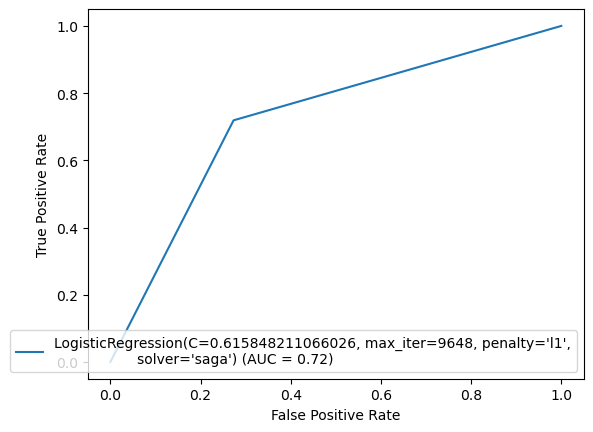

In [69]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_Model)
display.plot()

-- As we can see from the above AUC-ROC curve,
   The AUC value of the Final Model is 0.72 which is nearly close to 1..
   which means the value we got is very good..as this value says us that the differenciation of classes from this Final Model
   will be good for our prediction..

# Saving the model 

In [70]:
import joblib
joblib.dump(Final_Model,"Red_Wine_Classification.pkl")

['Red_Wine_Classification.pkl']

In [73]:
model = joblib.load("Red_Wine_Classification.pkl")
prediction = model.predict(X_test)
prediction

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [74]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

Predicted  Original
0            1         1
1            0         0
2            0         0
3            1         1
4            0         1
..         ...       ...
431          0         1
432          0         0
433          1         1
434          0         0
435          1         1

[436 rows x 2 columns]